## El siguiente modelo busca identificar quien o no se va inscribir en el bootcamp

In [125]:
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
set_config(display='diagram')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from math import sqrt

In [126]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek

In [145]:
import subprocess
import sys
import re
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, roc_curve,confusion_matrix,precision_recall_curve, average_precision_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

In [127]:
df = pd.read_csv("cleaned_inscrito.csv")

In [128]:
df

,Entrenamiento,Email,Egresado,Precios US,Incluye pasantia,Primer contacto,Estatus laboral,Razon de retiro,Razon de eleccion del bootcamp,Proveedores de bootcamp,Horario de los bootcamps,Primer contacto_Instagram,Primer contacto_WhatsApp,Incluye pasantia_0,Incluye pasantia_1
0,Bootcamp en Desarrollo Web con C#,gmail.com,0,2900.0,0,Instagram,1,Poco tiempo/ Costo del bootcamp / Razones labo...,Crecimiento laboral,Maestros de Talendig,"Lunes, miercoles y viernes de 6:00pm a 8:00 pm",1.0,0.0,1.0,0.0
1,Bootcamp en Desarrollo Web con C#,gmail.com,0,2900.0,0,Instagram,1,Costo del Bootcamp,Crecimiento laboral,Maestros de Talendig,"Lunes, miercoles y viernes de 6:00pm a 8:00 pm",1.0,0.0,1.0,0.0
2,Bootcamp en Desarrollo Web con C#,gmail.com,0,2900.0,0,Instagram,1,Otros Motivos,Crecimiento laboral,Maestros de Talendig,"Lunes, miercoles y viernes de 6:00pm a 8:00 pm",1.0,0.0,1.0,0.0
3,Bootcamp en Desarrollo Web con Java,gmail.com,0,2900.0,0,Instagram,0,Otros Motivos,Crecimiento laboral,Maestros de Talendig,"Martes, jueves y viernes de 6:00 pm a 8:00 pm",1.0,0.0,1.0,0.0
4,Bootcamp en Desarrollo Web con Java,gmail.com,0,2900.0,0,Instagram,1,Otros Motivos,Crecimiento laboral,Maestros de Talendig,"Martes, jueves y viernes de 6:00 pm a 8:00 pm",1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Cloud Engineer,gmail.com,1,2900.0,0,WhatsApp,0,Costo del Bootcamp,Otras Razones,Maestros de Talendig,"Luner, miercoles y viernes de 8: pm a 10:00 pm",0.0,1.0,1.0,0.0
169,Bootcamp en Desarrollo Web,gmail.com,1,2900.0,0,WhatsApp,0,Costo del Bootcamp,Otras Razones,Maestros de Talendig,"Lunes, miercoles y viernes de 8: pm a 10:00 pm",0.0,1.0,1.0,0.0
170,Bootcamp en Data Science y Machine Learning en...,gmail.com,1,3450.0,1,WhatsApp,0,Otros Motivos,Otras Razones,Maestros de Talendig,"Martes, Jueves y Sabados",0.0,1.0,0.0,1.0
171,Diseno UI/UX,gmail.com,1,2900.0,0,WhatsApp,0,Otros Motivos,Otras Razones,Maestros de Talendig,"Lunes, miercoles y jueves de 7:00 pm a 9:00 pm",0.0,1.0,1.0,0.0


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entrenamiento                   173 non-null    object 
 1   Email                           173 non-null    object 
 2   Egresado                        173 non-null    int64  
 3   Precios US                      173 non-null    float64
 4   Incluye pasantia                173 non-null    int64  
 5   Primer contacto                 173 non-null    object 
 6   Estatus laboral                 173 non-null    int64  
 7   Razon de retiro                 173 non-null    object 
 8   Razon de eleccion del bootcamp  173 non-null    object 
 9   Proveedores de bootcamp         173 non-null    object 
 10  Horario de los bootcamps        173 non-null    object 
 11  Primer contacto_Instagram       173 non-null    float64
 12  Primer contacto_WhatsApp        173 

In [130]:
print(f'La tasa promedio de los que no se inscriben es de {np.round(df["Egresado"].mean(), 3) * 100}%')

La tasa promedio de los que no se inscriben es de 7.5%


In [131]:
# Dividir
X = df.drop(columns=['Egresado'])
y = df['Egresado']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
# Over-sample the minority class using SMOTE

In [133]:
### Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [134]:
# Scaler
scaler = StandardScaler()
median_imputer = SimpleImputer(strategy='median')
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [135]:
# Numeric pipeline
numeric_pipe = make_pipeline(scaler)
numeric_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [136]:
# Categorical pipeline
categorical_pipe = make_pipeline(ohe)
categorical_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [137]:
# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb1170718b0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb117071940>)])

In [138]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb1170718b0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb117071940>)])

In [139]:
# transform train and test
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [140]:
# Comprueben los valores faltantes y que los datos se escalen y tengan una codificación one-hot

print(np.isnan(X_train).sum().sum(), 'missing values in training data')
print(np.isnan(X_test).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train.dtype)
print('All data in X_test_processed are', X_test.dtype)
print('\n')
print('shape of data is', X_train.shape)
print('\n')
X_train

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (138, 54)




array([[ 0.38467547, -0.52704628,  2.02758751, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.38467547, -0.52704628,  2.02758751, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.38467547, -0.52704628,  2.02758751, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.38467547, -0.52704628, -0.49319696, ...,  0.        ,
         0.        ,  0.        ],
       [-2.3443629 , -0.52704628, -0.49319696, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.9265423 ,  1.8973666 ,  2.02758751, ...,  0.        ,
         0.        ,  0.        ]])

Para abordar el problema de clasificación desequilibrada, puede probar varias estrategias, como técnicas de remuestreo, el uso de diferentes métricas de evaluación o el ajuste del umbral de decisión. A continuación, se presentan algunas modificaciones a su código que implementan estas estrategias:

    Técnicas de remuestreo: sobre-muestrear la clase minoritaria utilizando SMOTE (Synthetic Minority Over-sampling Technique). 
Al utilizar la técnica SMOTE, se generan ejemplos sintéticos de la clase minoritaria para equilibrar las proporciones de las clases en el conjunto de datos de entrenamiento. Esto permite que el modelo de clasificación tenga un mejor rendimiento al identificar la clase minoritaria en el conjunto de datos desequilibrado.

In [141]:
# Over-sample the minority class using SMOTE
smote_tomek = SMOTETomek(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)
# Escala los datos
scaler = StandardScaler()
X_train_resample = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [142]:
print(y_train.value_counts())
print(y_train_resampled.value_counts())

0    128
1     10
Name: Egresado, dtype: int64
0    128
1    128
Name: Egresado, dtype: int64


In [143]:
def plot_confusion_matrix(y_true, y_pred, labels=None, normalize=False, title='Confusion Matrix', cmap='Blues'):
    """
    Plots a confusion matrix using seaborn heatmap.
    
    :param y_true: True labels.
    :type y_true: array-like, shape (n_samples,)
    :param y_pred: Predicted labels.
    :type y_pred: array-like, shape (n_samples,)
    :param labels: List of labels to index the matrix.
    :type labels: list of str, optional, default: None
    :param normalize: Whether to normalize the confusion matrix.
    :type normalize: bool, optional, default: False
    :param title: Title for the confusion matrix plot.
    :type title: str, optional, default: 'Confusion Matrix'
    :param cmap: Colormap to be used for the heatmap.
    :type cmap: str, optional, default: 'Blues'
    """
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    
    # Normalize the confusion matrix if requested
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Create a seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f' if normalize else 'd', cmap=cmap, xticklabels=labels, yticklabels=labels)

    # Set plot title and labels
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    # Show the plot
    plt.show()
    
    
def find_best_threshold(y_test, y_pred_prob):
    """
    Finds the best threshold for classification based on the highest F1 score.
    
    :param y_test: True target values.
    :type y_test: array-like
    :param y_pred_prob: Predicted probabilities for the positive class.
    :type y_pred_prob: array-like
    :return: Best threshold.
    :rtype: float
    """
    thresholds = np.arange(0, 1.01, 0.01)
    best_threshold = 0
    best_f1_score = 0
    for t in thresholds:
        y_pred_t = (y_pred_prob >= t).astype(int)
        f1 = f1_score(y_test, y_pred_t)
        if f1 > best_f1_score:
            best_f1_score = f1
            best_threshold = t
    return best_threshold

def plot_roc_curve(fpr, tpr, roc_auc, classifier_name):
    """
    Plots the ROC curve for a given classifier.
    
    :param fpr: False positive rates.
    :type fpr: array-like
    :param tpr: True positive rates.
    :type tpr: array-like
    :param roc_auc: Area under the ROC curve.
    :type roc_auc: float
    :param classifier_name: Name of the classifier.
    :type classifier_name: str
    """
    plt.plot(fpr, tpr, label=f'{classifier_name} AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")

def train_with_cross_validation(clf, X, y, cv=5):
    """
    Trains a classifier using cross-validation and returns the average performance metrics and the trained classifier.

    :param clf: Classifier to be trained.
    :type clf: Classifier object
    :param X: Training data.
    :type X: DataFrame
    :param y: Labels for the training data.
    :type y: Series
    :param cv: Number of cross-validation folds.
    :type cv: int
    :return: A dictionary containing average performance metrics and the trained classifier.
    :rtype: dict
    """

    y_pred = cross_val_predict(clf, X, y, cv=cv, n_jobs=-1)

    avg_metrics = {
        'accuracy': accuracy_score(y, y_pred),
        'precision': precision_score(y, y_pred),
        'recall': recall_score(y, y_pred),
        'f1': f1_score(y, y_pred),
        'roc_auc': roc_auc_score(y, y_pred)
    }

    clf.fit(X, y)  # Train the classifier on the entire dataset

    return avg_metrics, clf

def optimize_hyperparameters(classifier, param_grid, X_train, y_train,cv):
    """
    Optimizes hyperparameters for a classifier using GridSearchCV.
    
    :param classifier: The classifier to optimize.
    :type classifier: estimator
    :param param_grid: Dictionary with parameters names as keys and lists of parameter settings to try as values.
    :type param_grid: dict
    :param X_train: Training data.
    :type X_train: array-like
    :param y_train: Training target values.
    :type y_train: array-like
    :return: Best estimator found by grid search.
    :rtype: estimator
    """
    grid_search = GridSearchCV(classifier, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1,verbose=2)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

def encode_categorical_columns(data, categorical_columns):
    """
    Encodes categorical columns in *data* using One-Hot Encoding.
    
    :param data: Data to be encoded.
    :type data: DataFrame
    :param categorical_columns: Categorical columns in *data*.
    :type categorical_columns: list of str
    :return: Encoded data.
    :rtype: DataFrame
    """
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
    categorical_data = data[categorical_columns]
    encoded_categorical_data = encoder.fit_transform(categorical_data)
    
    encoded_columns = []
    for cat_col, categories in zip(categorical_columns, encoder.categories_):
        encoded_columns.extend([f"{cat_col}_{category}" for category in categories])
    
    encoded_df = pd.DataFrame(encoded_categorical_data, columns=encoded_columns, index=data.index)
    data = data.drop(categorical_columns, axis=1)
    data = pd.concat([data, encoded_df], axis=1)
    
    return data

def train_and_evaluate(clf, X_train, y_train, X_test, y_test):
    """
    Trains and evaluates a classifier using the specified data.
    
    :param clf: Classifier to be trained.
    :type clf: Classifier object
    :param X_train: Training data.
    :type X_train: DataFrame
    :param y_train: Labels for the training data.
    :type y_train: Series
    :param X_test: Test data.
    :type X_test: DataFrame
    :param y_test: Labels for the test data.
    :type y_test: Series
    """
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = clf.predict(X_test)
    y_pred_prob = clf.predict_proba(X_test)[:, 1]
    
    # Print evaluation metrics
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1-score: {f1_score(y_test, y_pred)}")
    print(f"AUC: {roc_auc_score(y_test, y_pred_prob)}")
    print(classification_report(y_test, y_pred))
    
    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_prob):.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='k')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()


--- XGBoost ---
Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=25, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=50, scale_pos_weight=1.0; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=50, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=100, scale_pos_weight=1.0; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, scale_pos_weight=1.0; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=5, n_estimators=10, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=5, n_estimators=25, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=5, n_estimators=25, scale_pos_weight=1.0; total time=   0.0s
[CV] END le

[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=25, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=25, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=50, scale_pos_weight=1.0; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=100, scale_pos_weight=1.0; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, scale_pos_weight=1.0; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=5, n_estimators=10, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=5, n_estimators=10, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=5, n_estimators=10, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=5, n_estimators=10, scale_pos_weight=1.0; total t

[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=25, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=50, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=100, scale_pos_weight=1.0; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=100, scale_pos_weight=1.0; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, scale_pos_weight=1.0; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=5, n_estimators=25, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=5, n_estimators=25, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=5, n_estimators=50, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=5, n_estimators=50, scale_pos_weight=1.0; total 

[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=25, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=50, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=100, scale_pos_weight=1.0; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, scale_pos_weight=1.0; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, scale_pos_weight=1.0; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=5, n_estimators=100, scale_pos_weight=1.0; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=5, n_estimators=100, scale_pos_weight=1.0; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=5, n_estimators=200, scale_pos_weight=1.0; tot

Optimized XGBoost hyperparameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.001, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00     

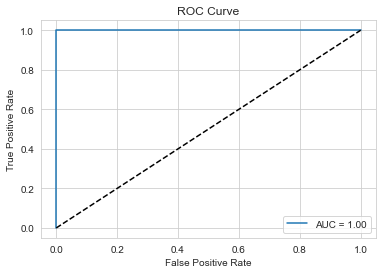

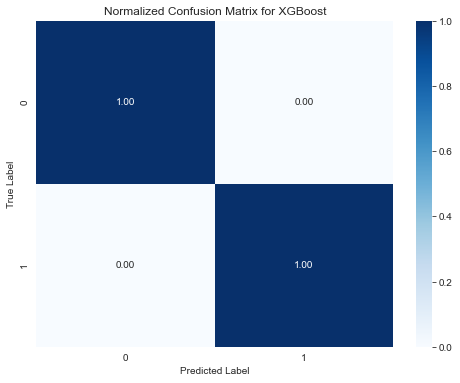

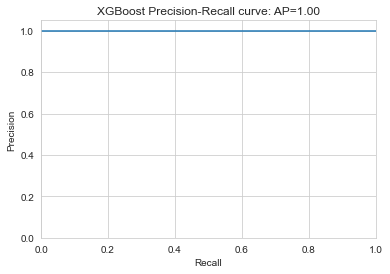

--- Random Forest ---
Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=25, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=25, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=25, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=25, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rat

[CV] END learning_rate=0.001, max_depth=3, n_estimators=50, scale_pos_weight=1.0; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=100, scale_pos_weight=1.0; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, scale_pos_weight=1.0; total time=   0.3s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, scale_pos_weight=1.0; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=5, n_estimators=100, scale_pos_weight=1.0; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=5, n_estimators=200, scale_pos_weight=1.0; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=5, n_estimators=200, scale_pos_weight=1.0; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=5, n_estimators=200, scale_pos_weight=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10, scale_pos_weight=1.0; tota

[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, scale_pos_weight=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, scale_pos_weight=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, scale_pos_weight=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, scale_pos_weight=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, scale_pos_weight=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, scale_pos_weight=1.0; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=25, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=25, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=100, scale_pos_weight=1.0; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=100, scale_pos_weight=1.0; total time= 

[CV] END learning_rate=0.1, max_depth=10, n_estimators=50, scale_pos_weight=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, scale_pos_weight=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, scale_pos_weight=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, scale_pos_weight=1.0; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=25, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=50, scale_pos_weight=1.0; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=50, scale_pos_weight=1.0; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=100, scale_pos_weight=1.0; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=100, scale_pos_weight=1.0; total ti

Optimized Random Forest hyperparameters: RandomForestClassifier(max_depth=1, random_state=42)
Accuracy: 0.9142857142857143
Precision: 0.5
Recall: 1.0
F1-score: 0.6666666666666666
AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        32
           1       0.50      1.00      0.67         3

    accuracy                           0.91        35
   macro avg       0.75      0.95      0.81        35
weighted avg       0.96      0.91      0.93        35



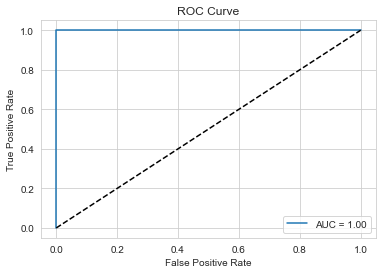

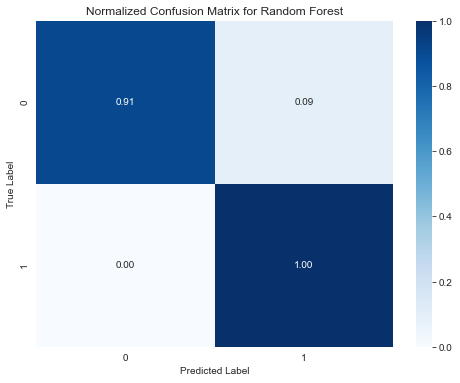

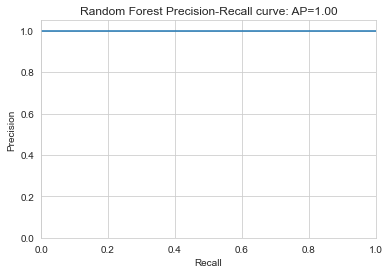

--- Logistic Regression ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimized Logistic Regression hyperparameters: LogisticRegression(max_iter=1000, penalty='l1', random_state=42, solver='saga')
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00         3

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



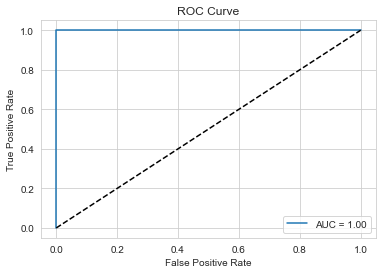

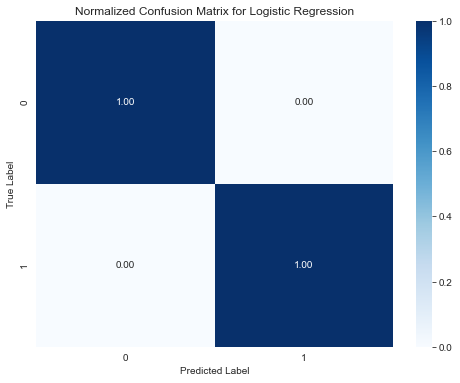

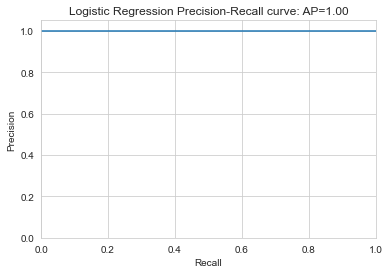

In [146]:
# Define classifiers and their parameter grids
xgb_clf = XGBClassifier(eval_metric='logloss')
rf_clf = RandomForestClassifier( random_state=42)
lr_clf = LogisticRegression(max_iter=1000, random_state=42)

ratio = y_train_resampled.value_counts()[0] / y_train_resampled.value_counts()[1]

xgb_param_grid = {
    'learning_rate': [0.001,0.01,0.1],
    'max_depth': [3, 5,10],
    'n_estimators': [10,25,50,100,200],
    'scale_pos_weight': [ratio]
}

rf_param_grid = {
    'n_estimators': [50,100, 200,],
    'max_depth': [1,3, 5,10,20],
    'min_samples_split': [2, 5,10],
    'min_samples_leaf': [1, 2,3]
}

lr_param_grid =    {'penalty': [None,'l1'],
    'solver': ['lbfgs', 'newton-cg', 'saga'],
    'class_weight': [None, 'balanced']}


classifier_param_grids = {
    'XGBoost': (xgb_clf, xgb_param_grid),
    'Random Forest': (rf_clf, rf_param_grid),
    'Logistic Regression': (lr_clf, lr_param_grid)
}
# Train, optimize, and evaluate the classifiers
for classifier_name, (clf, param_grid) in classifier_param_grids.items():
    print(f"--- {classifier_name} ---")
    # Optimize hyperparameters
    clf = optimize_hyperparameters(clf, param_grid, X_train_resampled, y_train_resampled,5)
    print(f"Optimized {classifier_name} hyperparameters: {clf}")
    train_and_evaluate(clf, X_train_resampled, y_train_resampled, X_test, y_test)      
    # Fit and predict
    m,clf=train_with_cross_validation(clf, X_train_resampled, y_train_resampled, cv=5)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]    
    # Calculate metrics
    plot_confusion_matrix(y_test, y_pred, labels=[0,1], normalize=True, title=f"Normalized Confusion Matrix for {classifier_name}")
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    average_precision = average_precision_score(y_test, y_proba)    
    # Plot precision-recall curve
    plt.step(recall, precision, where='post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(f'{classifier_name} Precision-Recall curve: AP={average_precision:.2f}')
    plt.show()

In [ ]:
feature_names = X_train.columns
# Get the absolute values of coefficients as feature importances
coefficients = clf.coef_
importances = np.mean(np.abs(coefficients), axis=0)
# Create a DataFrame for visualization
importance_df = pd.DataFrame({"feature": feature_names, "importance": importances})
importance_df = importance_df.sort_values(by="importance", ascending=False)
labels = importance_df["feature"].values
sizes = importance_df["importance"].values

In [ ]:
# Visualize feature importances using seaborn
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(x="importance", y="feature", data=importance_df[0:25])
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Terminado